ANOVA Table:
                                           Sum of Squares  Degrees of Freedom  \
C(Q("Material Type"))                        10683.722222                 2.0   
C(Q("Temperature"))                          39118.722222                 2.0   
C(Q("Material Type")):C(Q("Temperature"))     9613.777778                 4.0   
Residual                                     18230.750000                27.0   
Total                                        77646.972222                35.0   

                                           F-Statistic       P-value  
C(Q("Material Type"))                         7.911372  1.976083e-03  
C(Q("Temperature"))                          28.967692  1.908596e-07  
C(Q("Material Type")):C(Q("Temperature"))     3.559535  1.861117e-02  
Residual                                           NaN           NaN  
Total                                              NaN           NaN  


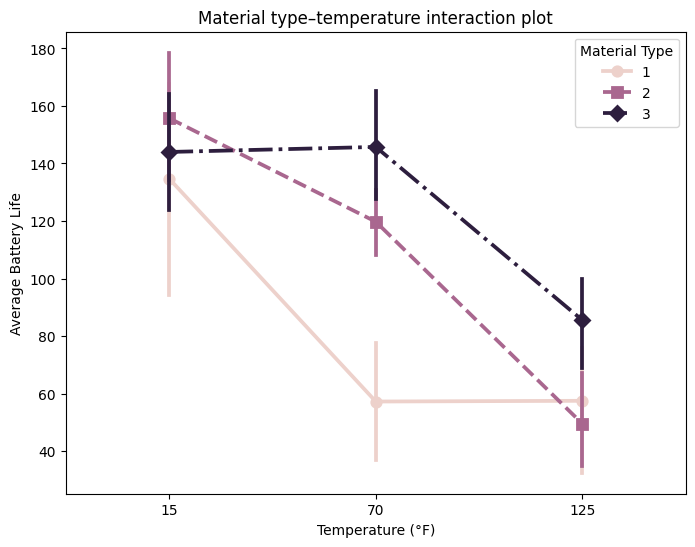

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame
data = {
    'Material Type': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
    'Temperature': [15, 15, 15, 15, 70, 70, 70, 70, 125, 125, 125, 125, 15, 15, 15, 15, 70, 70, 70, 70, 125, 125, 125, 125, 15, 15, 15, 15, 70, 70, 70, 70, 125, 125, 125, 125],
    'Battery Life': [130, 155, 74, 180, 34, 40, 80, 75, 20, 70, 82, 58, 
                     150, 188, 159, 126, 136, 122, 106, 115, 25, 70, 58, 45, 
                     138, 110, 168, 160, 174, 120, 150, 139, 96, 104, 82, 60]
}

df = pd.DataFrame(data)

# Two-way ANOVA
model = ols('Q("Battery Life") ~ C(Q("Material Type")) + C(Q("Temperature")) + C(Q("Material Type")):C(Q("Temperature"))', data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)

# Total sum of squares
total_ss = ((df['Battery Life'] - df['Battery Life'].mean()) ** 2).sum()
anova_table.loc['Total'] = pd.Series({
    'sum_sq': total_ss,
    'df': len(df) - 1
}, name='Total')

# Rename columns
anova_table = anova_table.rename(columns={'sum_sq': 'Sum of Squares', 'df': 'Degrees of Freedom', 'mean_sq': 'Mean Square', 'F': 'F-Statistic', 'PR(>F)': 'P-value'})

# F-statistic manually 'mean_sq' not directly available
for index in anova_table.index[:-1]:  # Exclude Total
    if index == 'Residual':
        continue  # Skip residual
    anova_table.at[index, 'F-Statistic'] = anova_table.loc[index, 'Sum of Squares'] / anova_table.loc[index, 'Degrees of Freedom'] / (anova_table.loc['Residual', 'Sum of Squares'] / anova_table.loc['Residual', 'Degrees of Freedom'])
    anova_table.at[index, 'P-value'] = 1 - stats.f.cdf(anova_table.loc[index, 'F-Statistic'], 
                                                       anova_table.loc[index, 'Degrees of Freedom'], 
                                                       anova_table.loc['Residual', 'Degrees of Freedom'])

# Results
print("ANOVA Table:")
print(anova_table)

# Plot
plt.figure(figsize=(8, 6))
sns.pointplot(data=df, x='Temperature', y='Battery Life', hue='Material Type', markers=['o', 's', 'D'], linestyles=['-', '--', '-.'])
plt.title('Material type–temperature interaction plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average Battery Life')
plt.legend(title='Material Type')
plt.show()
